In [41]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [42]:
#read the data
df =  pd.read_csv("/content/energy_consumption.csv")
df.head()

,customer_id,customer_type,regions,building_size_m2,occupants,energy_cost_brl
0,CUSTOMER_0001,residential,Northeast,24,2,64.51
1,CUSTOMER_0002,commercial,Midwest,24,1,55.26
2,CUSTOMER_0003,commercial,Southeast,24,1,74.54
3,CUSTOMER_0004,residential,Northeast,45,4,147.06
4,CUSTOMER_0005,residential,Southeast,45,4,143.06


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       5000 non-null   object 
 1   customer_type     5000 non-null   object 
 2   regions           5000 non-null   object 
 3   building_size_m2  5000 non-null   int64  
 4   occupants         5000 non-null   int64  
 5   energy_cost_brl   5000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 234.5+ KB


In [44]:
df.describe()

,building_size_m2,occupants,energy_cost_brl
count,5000.00000,5000.000000,5000.000000
mean,39.57620,2.301800,86.874028
std,17.51638,1.032729,24.383261
min,17.00000,1.000000,52.520000
25%,24.00000,1.000000,68.557500
50%,45.00000,2.000000,83.715000
75%,45.00000,3.000000,98.242500
max,77.00000,4.000000,158.610000


In [45]:
df.columns

Index(['customer_id', 'customer_type', 'regions', 'building_size_m2',
       'occupants', 'energy_cost_brl'],
      dtype='object')

               Count  Percentage
customer_id                     
CUSTOMER_5000      1        0.02
CUSTOMER_0001      1        0.02
CUSTOMER_0002      1        0.02
CUSTOMER_0003      1        0.02
CUSTOMER_0004      1        0.02
...              ...         ...
CUSTOMER_0013      1        0.02
CUSTOMER_0012      1        0.02
CUSTOMER_0011      1        0.02
CUSTOMER_0010      1        0.02
CUSTOMER_0009      1        0.02

[5000 rows x 2 columns]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
               Count  Percentage
customer_type                   
residential     3261       65.22
commercial      1739       34.78
-------------------------------------------------------------------------------------------------------------------------------------------------------------

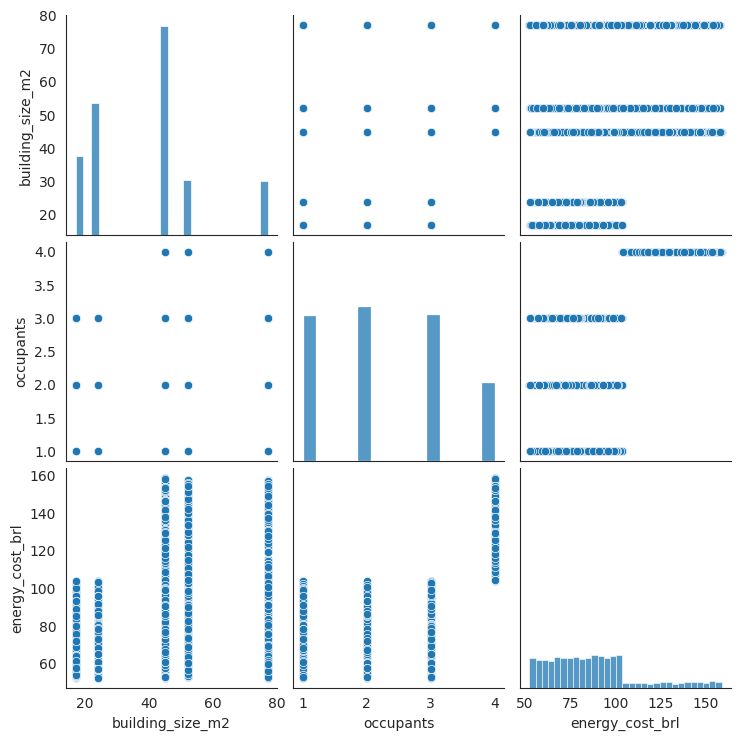

In [46]:
for column  in df.select_dtypes("O"):
    print(pd.DataFrame({"Count":df[column ].value_counts(),
                        "Percentage":df[column].value_counts(normalize=True)*100}))
    print("--------"*32)

sns.pairplot(df)
plt.show()

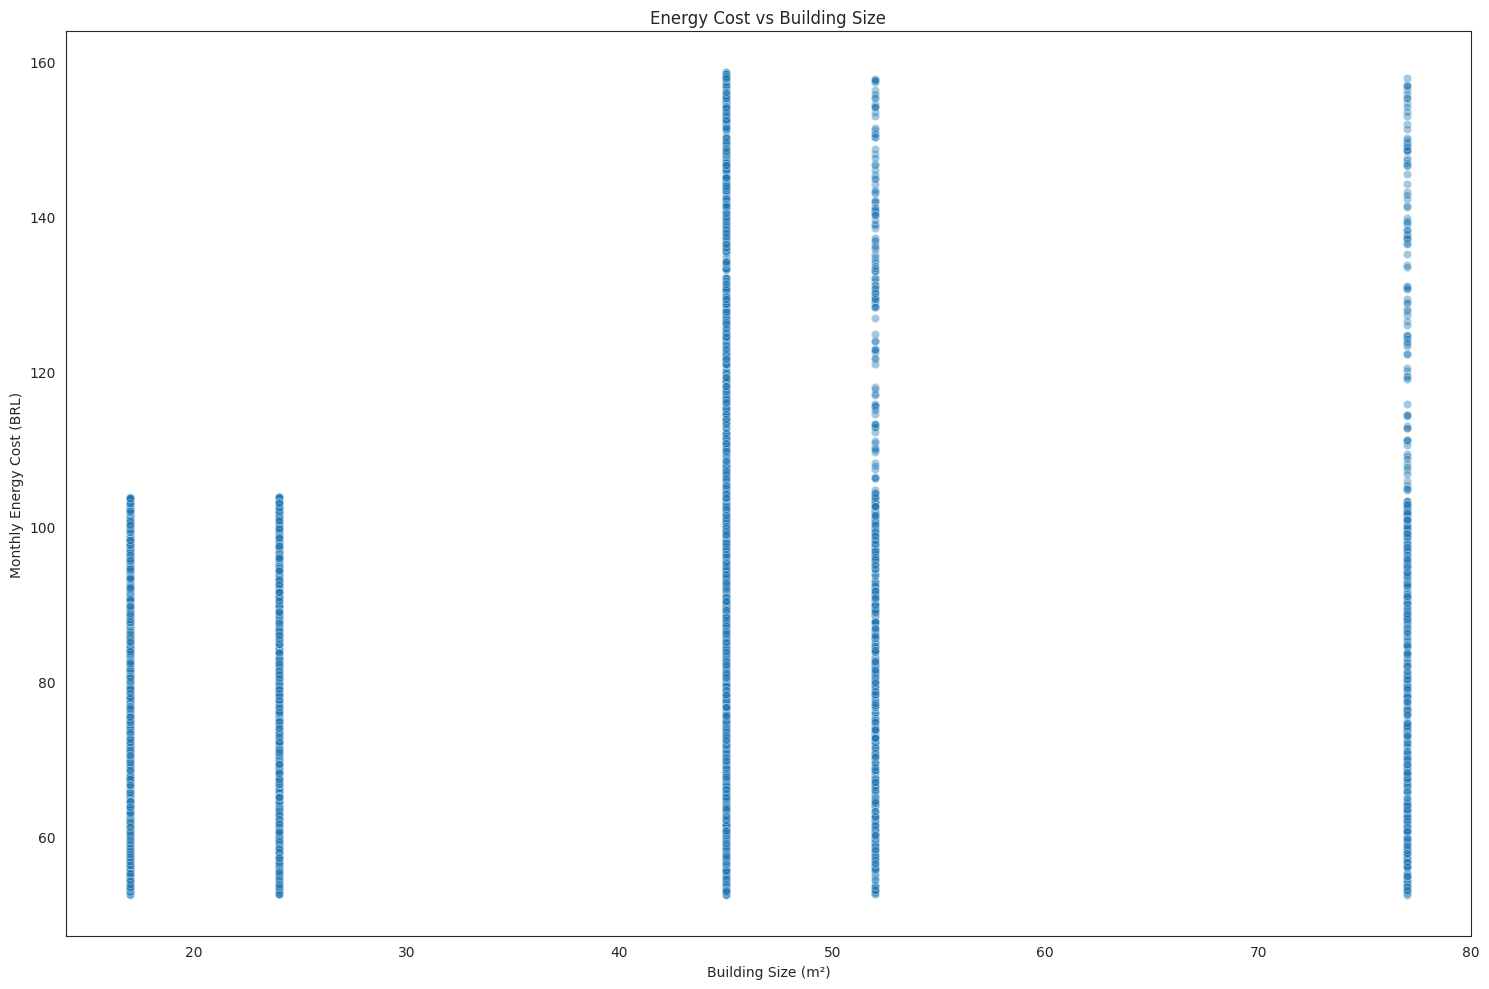

In [47]:
sns.set_style("white")

plt.figure(figsize=(15, 10))

sns.scatterplot(
    data=df,
    x='building_size_m2',
    y='energy_cost_brl',
    alpha=0.4
)

plt.xlabel("Building Size (m²)")
plt.ylabel("Monthly Energy Cost (BRL)")
plt.title("Energy Cost vs Building Size")

plt.tight_layout()
plt.show()


In [48]:
df.groupby('regions').agg({
    'energy_cost_brl': ['mean', 'median'],
    'building_size_m2': 'mean',
    'occupants': 'mean'
})


energy_cost_brl         building_size_m2 occupants
                     mean  median             mean      mean
regions                                                     
Midwest         86.307266  83.210        39.743539  2.301193
North           87.594638  83.650        41.486166  2.324111
Northeast       86.927401  84.490        38.505529  2.268562
South           86.743942  83.625        38.958506  2.323651
Southeast       88.097547  85.250        39.299376  2.334719

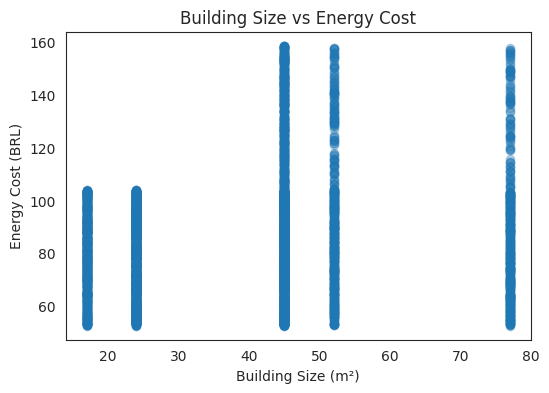

In [49]:
plt.figure(figsize=(6,4))
plt.scatter(
    df['building_size_m2'],
    df['energy_cost_brl'],
    alpha=0.3
)
plt.xlabel("Building Size (m²)")
plt.ylabel("Energy Cost (BRL)")
plt.title("Building Size vs Energy Cost")
plt.show()


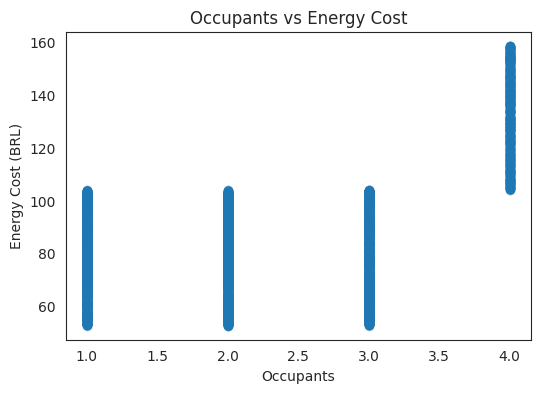

In [50]:
plt.figure(figsize=(6,4))
plt.scatter(
    df['occupants'],
    df['energy_cost_brl'],
    alpha=0.3
)
plt.xlabel("Occupants")
plt.ylabel("Energy Cost (BRL)")
plt.title("Occupants vs Energy Cost")
plt.show()


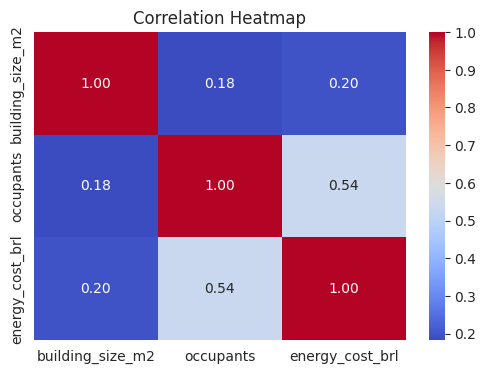

In [51]:
corr = df.drop(columns=['customer_id','regions','customer_type']).corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


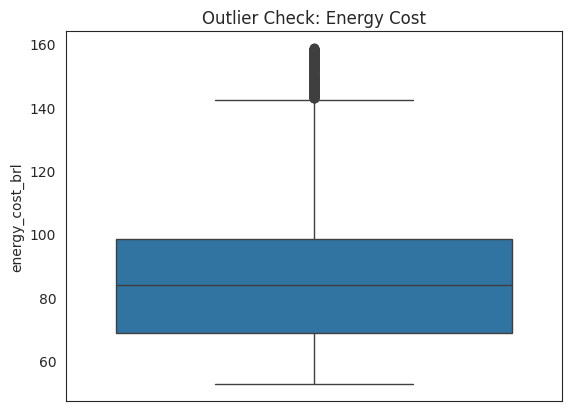

In [52]:
sns.boxplot(y=df['energy_cost_brl'])
plt.title("Outlier Check: Energy Cost")
plt.show()


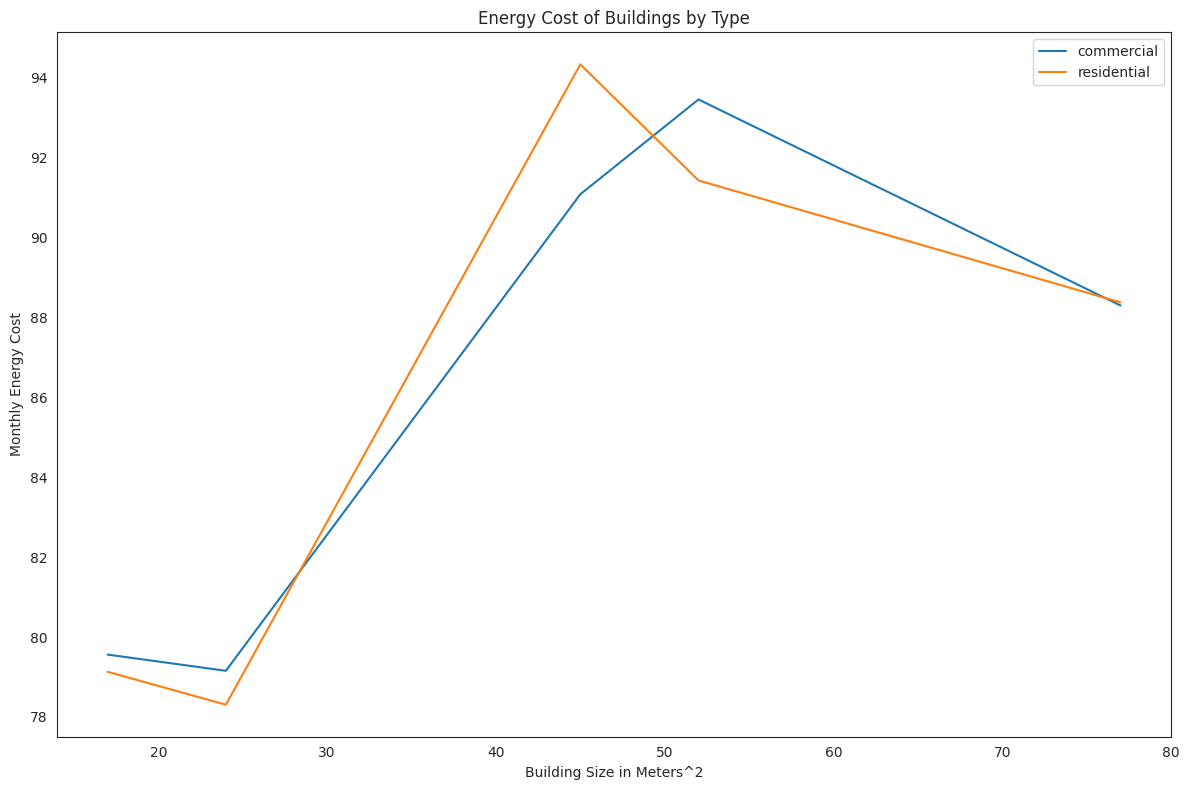

In [53]:
Building_Type = df.groupby(['building_size_m2', 'customer_type'])['energy_cost_brl'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data = Building_Type, x = 'building_size_m2', y = 'energy_cost_brl', hue = 'customer_type').set(xlabel="Building Size in Meters^2", ylabel= "Monthly Energy Cost", title=
                                                                                                      "Energy Cost of Buildings by Type")
plt.legend()
plt.tight_layout()
plt.show()

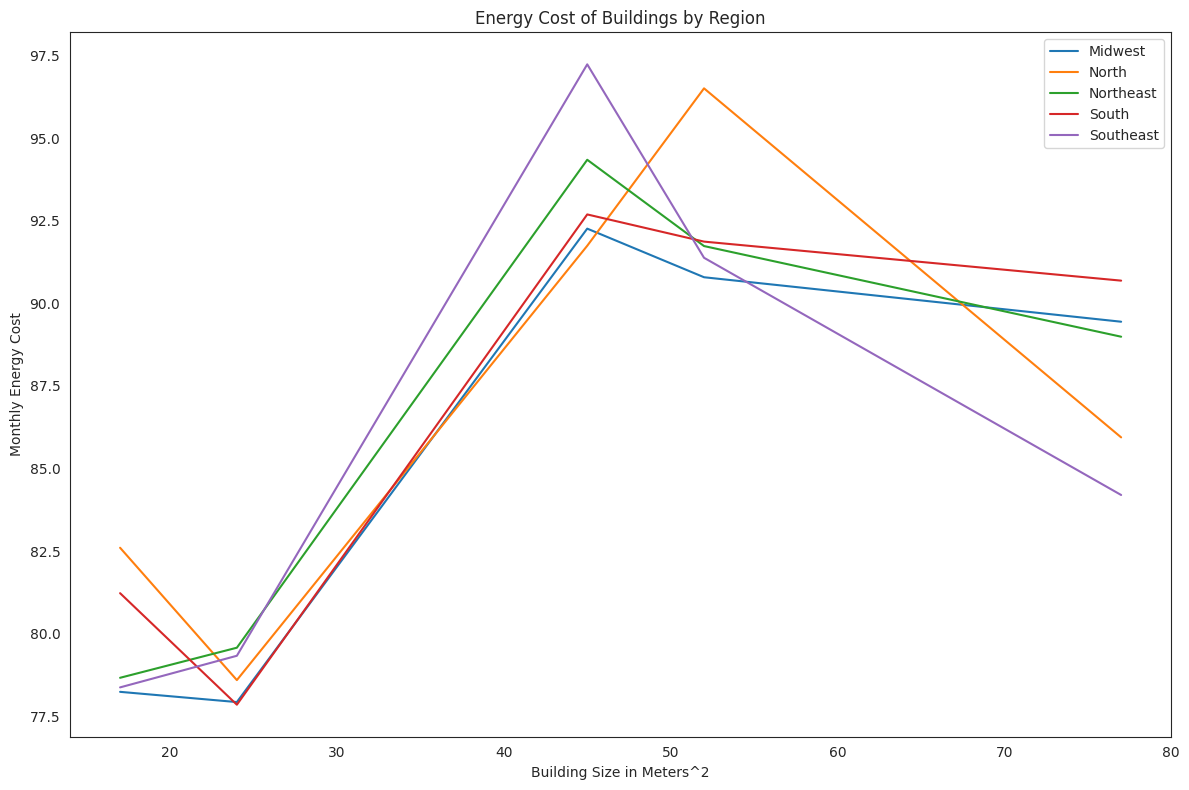

In [54]:
import warnings

warnings.filterwarnings("ignore")
region_data = df.groupby(['building_size_m2', 'regions'])['energy_cost_brl'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data= region_data, x = 'building_size_m2', y = 'energy_cost_brl', hue = 'regions').set(xlabel="Building Size in Meters^2", ylabel="Monthly Energy Cost", title =
                                                                                                   "Energy Cost of Buildings by Region")

plt.legend()
plt.tight_layout()
plt.show()

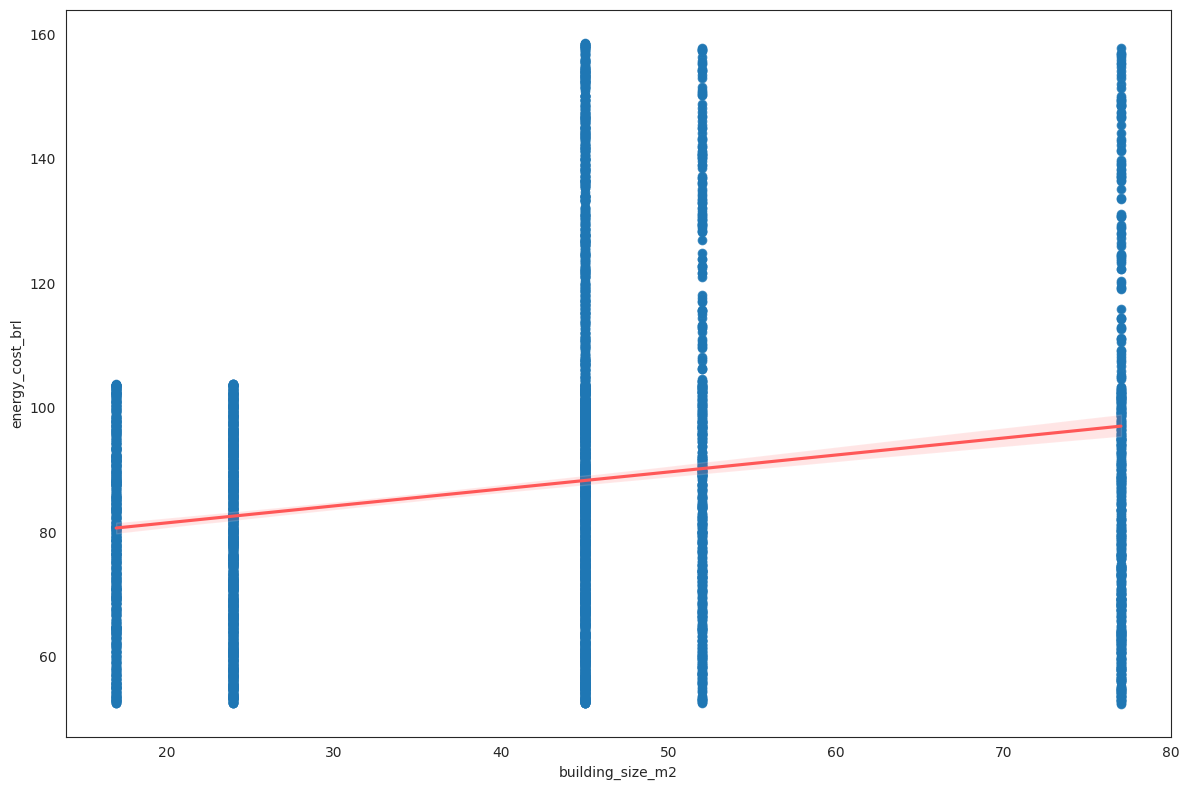

In [55]:

sns.set_style('white')

plt.figure(figsize=(12, 8))

sns.scatterplot(data=df, x = 'building_size_m2', y = 'energy_cost_brl')
sns.regplot(data=df, x = 'building_size_m2', y = 'energy_cost_brl', line_kws={"color": '#ff5757'})

plt.tight_layout()
plt.show()

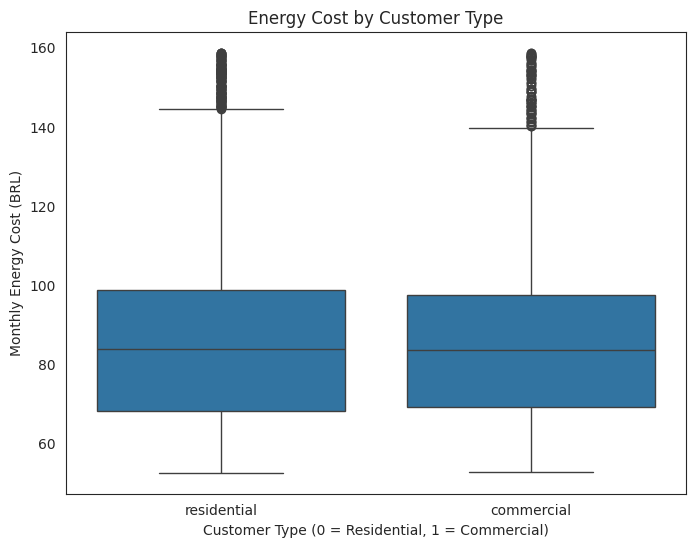

In [56]:
# Boxplot chosen instead of barplot to show:
# - Median difference
# - Spread of values
# - Presence of outliers per customer type

plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x='customer_type',
    y='energy_cost_brl'
)

plt.xlabel("Customer Type (0 = Residential, 1 = Commercial)")
plt.ylabel("Monthly Energy Cost (BRL)")
plt.title("Energy Cost by Customer Type")

plt.show()


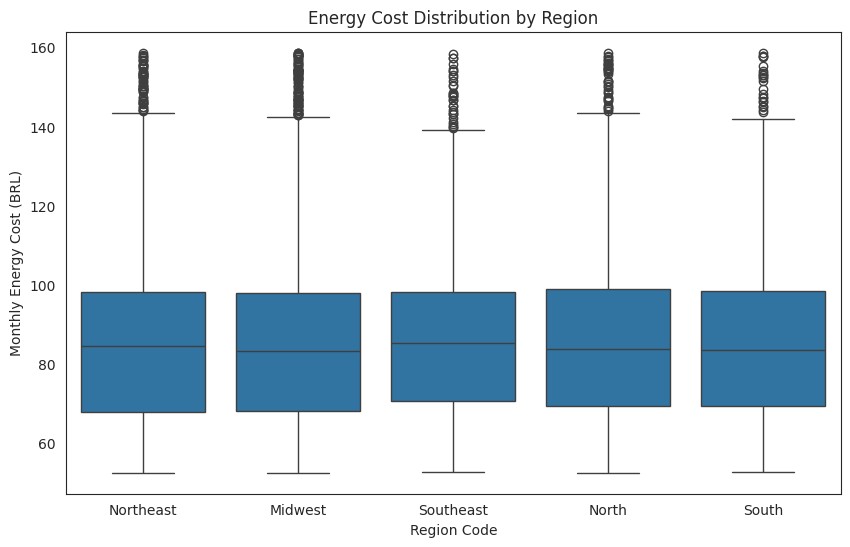

In [57]:
# Shows how energy costs vary by region
# Useful to check if geography contributes to energy usage patterns

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df,
    x='regions',
    y='energy_cost_brl'
)

plt.xlabel("Region Code")
plt.ylabel("Monthly Energy Cost (BRL)")
plt.title("Energy Cost Distribution by Region")

plt.show()


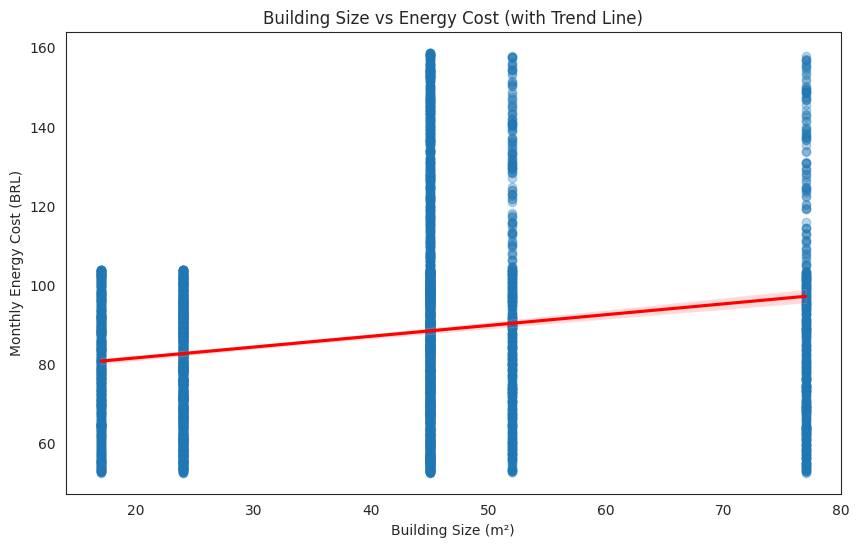

In [58]:
# Regression line added to understand overall trend
# Helps decide whether linear models are appropriate

plt.figure(figsize=(10,6))
sns.regplot(
    data=df,
    x='building_size_m2',
    y='energy_cost_brl',
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'}
)

plt.xlabel("Building Size (m²)")
plt.ylabel("Monthly Energy Cost (BRL)")
plt.title("Building Size vs Energy Cost (with Trend Line)")

plt.show()


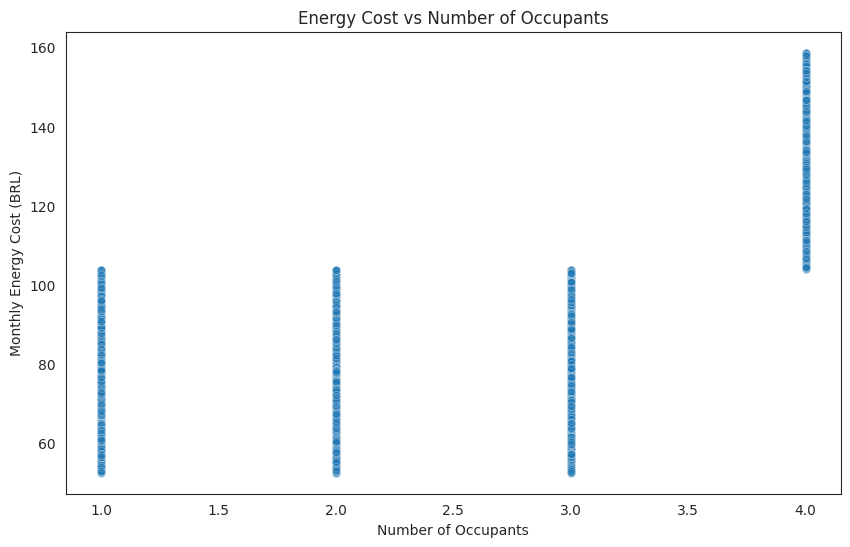

In [59]:
# This plot checks whether occupancy affects energy usage
# Often weaker than building size but still relevant

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='occupants',
    y='energy_cost_brl',
    alpha=0.4
)

plt.xlabel("Number of Occupants")
plt.ylabel("Monthly Energy Cost (BRL)")
plt.title("Energy Cost vs Number of Occupants")

plt.show()


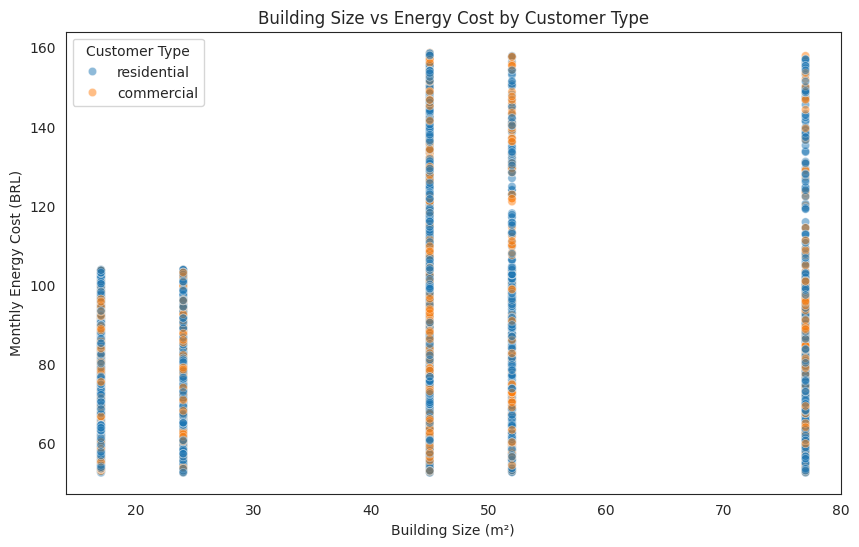

In [60]:
# Checks interaction between:
# - customer_type
# - building size
# Commercial buildings often scale energy usage differently

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='building_size_m2',
    y='energy_cost_brl',
    hue='customer_type',
    alpha=0.5
)

plt.xlabel("Building Size (m²)")
plt.ylabel("Monthly Energy Cost (BRL)")
plt.title("Building Size vs Energy Cost by Customer Type")
plt.legend(title="Customer Type")

plt.show()


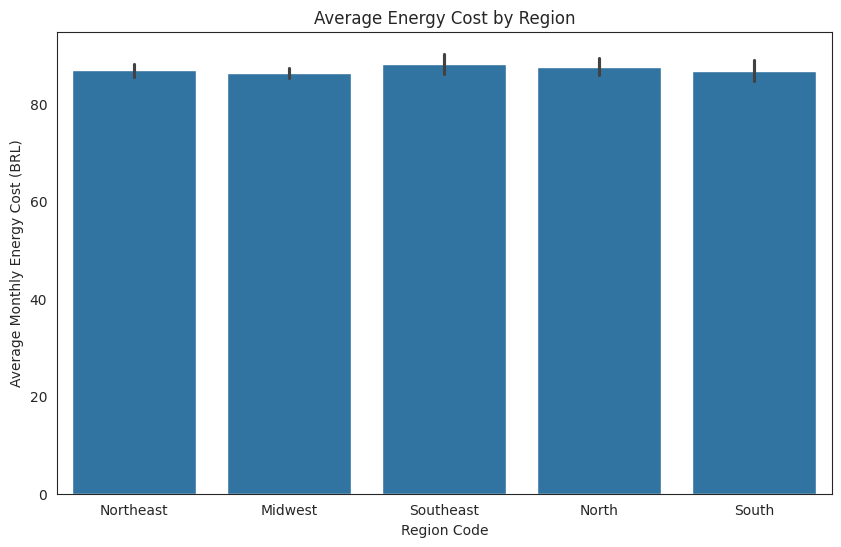

In [61]:
# Barplot is valid here because regions are categorical
# Shows average energy cost per region

plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x='regions',
    y='energy_cost_brl',
    estimator='mean'
)

plt.xlabel("Region Code")
plt.ylabel("Average Monthly Energy Cost (BRL)")
plt.title("Average Energy Cost by Region")

plt.show()


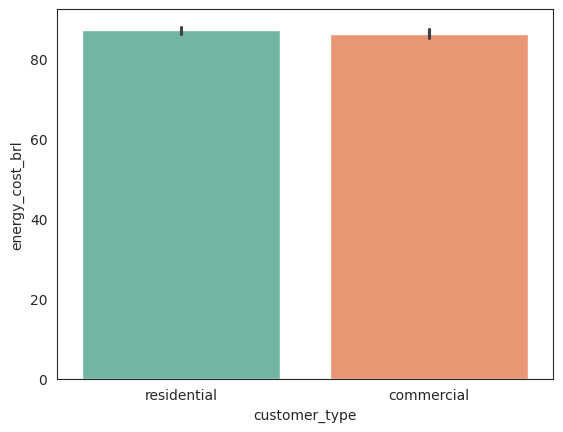

In [62]:
sns.barplot(x="customer_type",y="energy_cost_brl",data=df,palette="Set2")
plt.show()


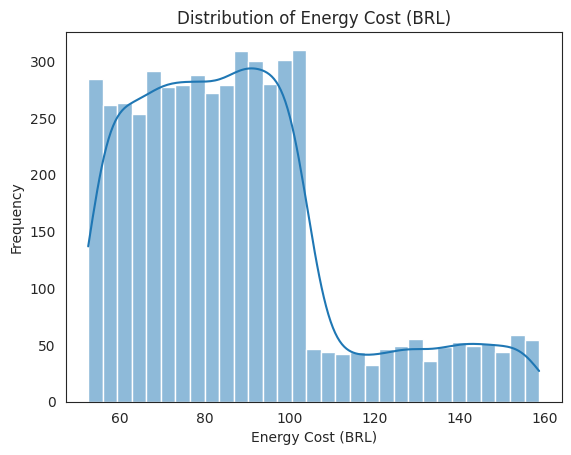

In [63]:
sns.histplot(df['energy_cost_brl'], kde=True)
plt.title("Distribution of Energy Cost (BRL)")
plt.xlabel("Energy Cost (BRL)")
plt.ylabel("Frequency")
plt.show()


In [64]:
df = df.drop("customer_id",axis=1)
df = pd.get_dummies(df, columns=["customer_type", "regions"], drop_first=True)
X = df.drop("energy_cost_brl",axis=1)
y = df["energy_cost_brl"]

In [65]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
model = AdaBoostRegressor().fit(X_train,y_train)
y_pred = model.predict(X_test)
print("\nAdaBoost Regressor Performance:")
print(f"R2 Score: {r2_score(y_test,y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test,y_pred)}")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")


AdaBoost Regressor Performance:
R2 Score: 0.6176726697622722
Mean Squared Error: 224.10634927103132
RMSE: 14.970182005274062
Mean Absolute Error: 12.92847086778532


In [68]:
model_ada = AdaBoostRegressor(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.1, 0.5, 1.0],
    'loss': ['linear', 'square', 'exponential']
}


grid_search = GridSearchCV(estimator=model_ada,
                           param_grid=param_grid,
                           cv=15,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=2)
grid_search.fit(X_train, y_train)

#
print("\nOptimization finished.")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation R2 Score (Best CV Score): {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


print("\nOptimized AdaBoost Regressor Performance (Test Set):")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")

Fitting 15 folds for each of 36 candidates, totalling 540 fits

Optimization finished.
Best Parameters: {'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 50}
Best Cross-Validation R2 Score (Best CV Score): 0.6133

Optimized AdaBoost Regressor Performance (Test Set):
R2 Score: 0.6192
Mean Squared Error: 223.2071
RMSE: 14.9401
Mean Absolute Error: 12.8869



🚀 ENERGY EMISSIONS PREDICTION MODEL TRAINING PIPELINE
STEP 1: LOADING AND EXPLORING DATA

📊 Dataset Shape: (5000, 6)
   Rows: 5,000
   Columns: 6

📋 Column Names and Types:
customer_id          object
customer_type        object
regions              object
building_size_m2      int64
occupants             int64
energy_cost_brl     float64
dtype: object

🔍 First Few Rows:
     customer_id customer_type    regions  building_size_m2  occupants  \
0  CUSTOMER_0001   residential  Northeast                24          2   
1  CUSTOMER_0002    commercial    Midwest                24          1   
2  CUSTOMER_0003    commercial  Southeast                24          1   
3  CUSTOMER_0004   residential  Northeast                45          4   
4  CUSTOMER_0005   residential  Southeast                45          4   

   energy_cost_brl  
0            64.51  
1            55.26  
2            74.54  
3           147.06  
4           143.06  

📈 Statistical Summary:
       building_size_m2    occ

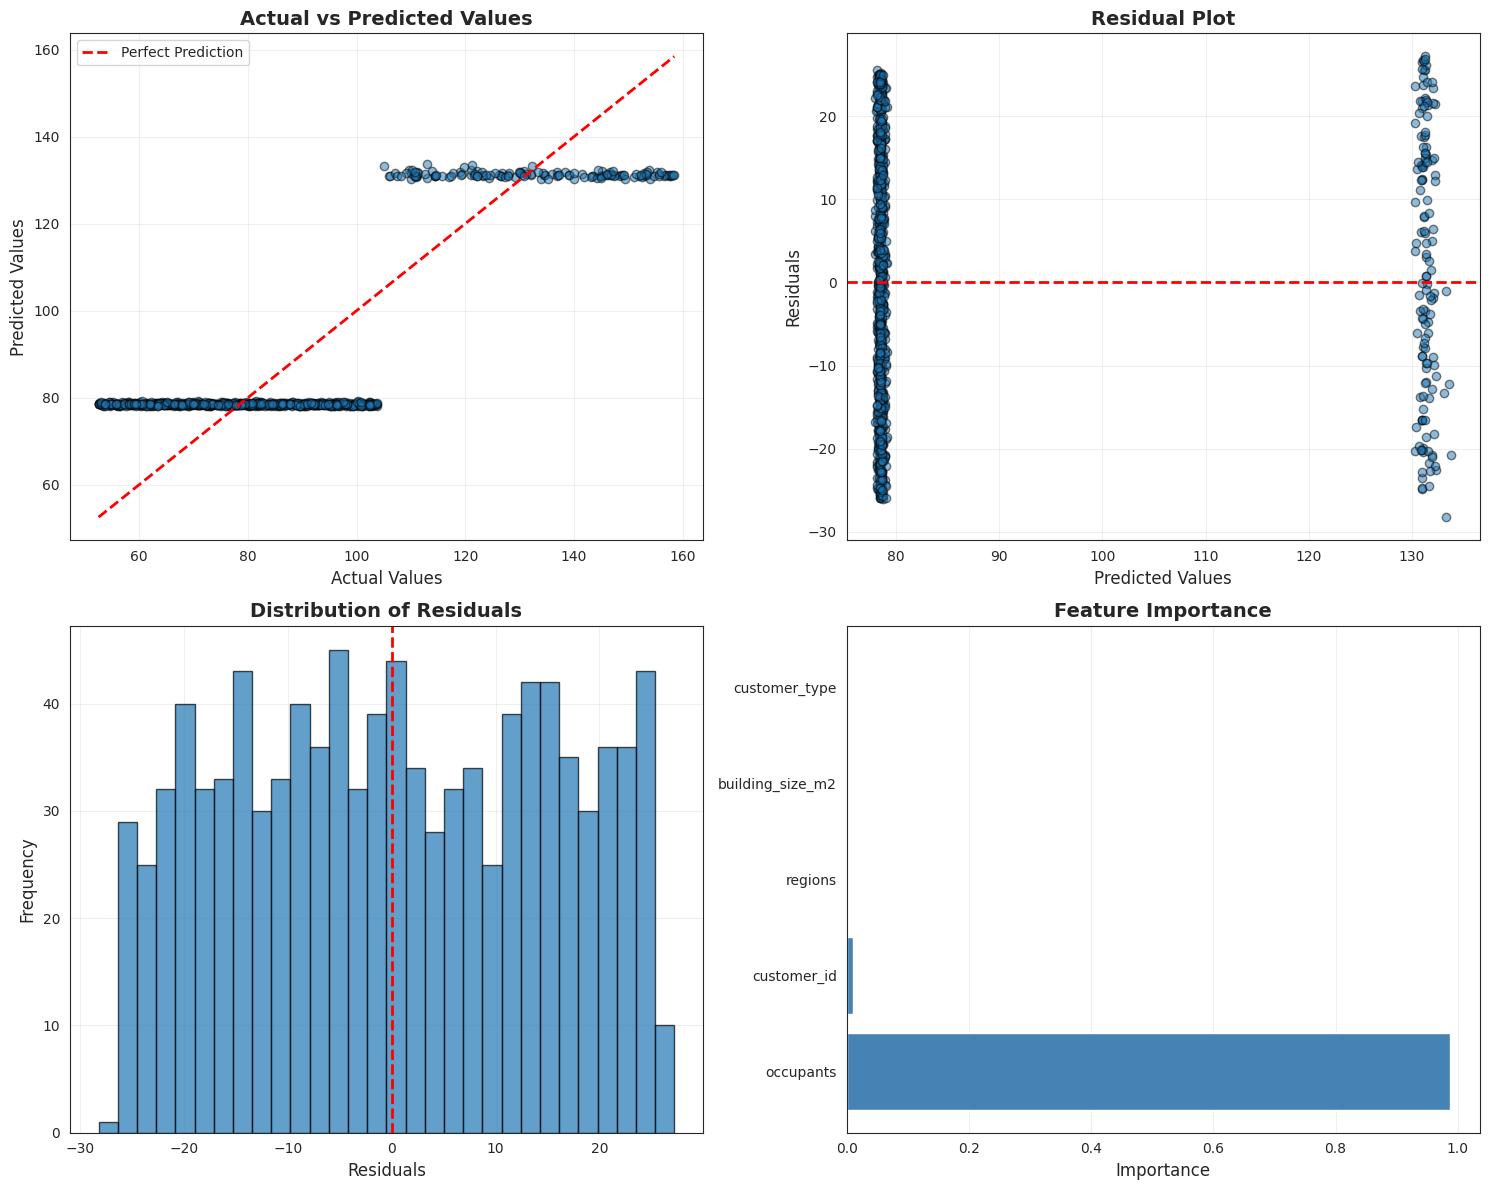


STEP 5: SAVING MODEL AND PREPROCESSORS

✅ Model saved as 'adaboost_model.pkl'
✅ Scaler saved as 'scaler.pkl'
✅ Label encoders saved as 'label_encoders.pkl'
✅ Feature names saved as 'feature_names.pkl'
✅ Metrics saved as 'model_metrics.pkl'

📦 All files saved successfully!

Saved files:
   1. adaboost_model.pkl
   2. scaler.pkl
   3. label_encoders.pkl
   4. feature_names.pkl
   5. model_metrics.pkl
   6. model_evaluation.png

✅ PIPELINE COMPLETED SUCCESSFULLY!

You can now use the Gradio app with the trained model!
Run: python app.py


In [69]:
"""
Complete Energy Emissions Prediction Model Training Pipeline
================================================================
This script includes:
1. Data loading and preprocessing
2. Feature engineering
3. Model training with GridSearchCV
4. Model evaluation
5. Model and preprocessor saving
"""

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# PART 1: DATA LOADING AND EXPLORATION
# ============================================================================

def load_and_explore_data(filepath):
    """
    Load dataset and perform initial exploration
    """
    print("=" * 80)
    print("STEP 1: LOADING AND EXPLORING DATA")
    print("=" * 80)

    # Load data
    df = pd.read_csv(filepath)

    print(f"\n📊 Dataset Shape: {df.shape}")
    print(f"   Rows: {df.shape[0]:,}")
    print(f"   Columns: {df.shape[1]}")

    print("\n📋 Column Names and Types:")
    print(df.dtypes)

    print("\n🔍 First Few Rows:")
    print(df.head())

    print("\n📈 Statistical Summary:")
    print(df.describe())

    print("\n❓ Missing Values:")
    print(df.isnull().sum())

    print("\n✅ Data loaded successfully!")
    return df

# ============================================================================
# PART 2: DATA PREPROCESSING
# ============================================================================

def preprocess_data(df, target_column='emissions'):
    """
    Preprocess the dataset:
    - Handle missing values
    - Encode categorical variables
    - Scale numerical features
    - Split into train/test sets
    """
    print("\n" + "=" * 80)
    print("STEP 2: DATA PREPROCESSING")
    print("=" * 80)

    # Make a copy
    df_processed = df.copy()

    # 1. Handle missing values
    print("\n1️⃣ Handling missing values...")
    if df_processed.isnull().sum().sum() > 0:
        # Fill numerical columns with median
        numerical_cols = df_processed.select_dtypes(include=['float64', 'int64']).columns
        for col in numerical_cols:
            if df_processed[col].isnull().sum() > 0:
                df_processed[col].fillna(df_processed[col].median(), inplace=True)

        # Fill categorical columns with mode
        categorical_cols = df_processed.select_dtypes(include=['object']).columns
        for col in categorical_cols:
            if df_processed[col].isnull().sum() > 0:
                df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)

        print("   ✅ Missing values handled")
    else:
        print("   ✅ No missing values found")

    # 2. Encode categorical variables
    print("\n2️⃣ Encoding categorical variables...")
    label_encoders = {}
    categorical_columns = df_processed.select_dtypes(include=['object']).columns

    # Remove target column if it's categorical
    if target_column in categorical_columns:
        categorical_columns = categorical_columns.drop(target_column)

    for col in categorical_columns:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
        label_encoders[col] = le
        print(f"   ✅ Encoded '{col}': {len(le.classes_)} unique values")

    # 3. Separate features and target
    print("\n3️⃣ Separating features and target...")

    if target_column not in df_processed.columns:
        print(f"   ⚠️ Warning: Target column '{target_column}' not found!")
        print(f"   Available columns: {list(df_processed.columns)}")
        # Use the last column as target
        target_column = df_processed.columns[-1]
        print(f"   Using '{target_column}' as target column")

    X = df_processed.drop(columns=[target_column])
    y = df_processed[target_column]

    print(f"   Features shape: {X.shape}")
    print(f"   Target shape: {y.shape}")
    print(f"   Feature columns: {list(X.columns)}")

    # 4. Split into train and test sets
    print("\n4️⃣ Splitting data into train/test sets...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    print(f"   Training set: {X_train.shape[0]:,} samples")
    print(f"   Test set: {X_test.shape[0]:,} samples")

    # 5. Scale features (optional but recommended)
    print("\n5️⃣ Scaling features...")
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert back to DataFrame to preserve column names
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    print("   ✅ Features scaled using StandardScaler")

    print("\n✅ Preprocessing completed!")

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, label_encoders, X.columns

# ============================================================================
# PART 3: MODEL TRAINING WITH GRIDSEARCH
# ============================================================================

def train_adaboost_model(X_train, y_train):
    """
    Train AdaBoost Regressor with GridSearchCV for hyperparameter tuning
    """
    print("\n" + "=" * 80)
    print("STEP 3: MODEL TRAINING WITH GRIDSEARCHCV")
    print("=" * 80)

    # Define parameter grid
    param_grid = {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1.0],
        'loss': ['linear', 'square', 'exponential']
    }

    print("\n🔧 Hyperparameter Grid:")
    for param, values in param_grid.items():
        print(f"   {param}: {values}")

    total_combinations = np.prod([len(v) for v in param_grid.values()])
    print(f"\n📊 Total parameter combinations: {total_combinations}")

    # Initialize AdaBoost
    base_model = AdaBoostRegressor(random_state=42)

    # Setup GridSearchCV
    print("\n🔍 Starting GridSearchCV with 15-fold cross-validation...")
    grid_search = GridSearchCV(
        estimator=base_model,
        param_grid=param_grid,
        cv=15,  # 15-fold cross-validation
        scoring='r2',
        n_jobs=-1,  # Use all CPU cores
        verbose=2,
        return_train_score=True
    )

    # Train model
    print("\n⏳ Training in progress (this may take a few minutes)...\n")
    grid_search.fit(X_train, y_train)

    print("\n" + "=" * 80)
    print("✅ OPTIMIZATION FINISHED")
    print("=" * 80)

    # Best parameters
    print("\n🏆 Best Parameters:")
    for param, value in grid_search.best_params_.items():
        print(f"   {param}: {value}")

    print(f"\n📈 Best Cross-Validation R² Score: {grid_search.best_score_:.4f}")

    # Get best model
    best_model = grid_search.best_estimator_

    # Display top 5 parameter combinations
    print("\n📊 Top 5 Parameter Combinations:")
    results_df = pd.DataFrame(grid_search.cv_results_)
    results_df = results_df.sort_values('rank_test_score')

    for idx, row in results_df.head(5).iterrows():
        print(f"\n   Rank {int(row['rank_test_score'])}:")
        print(f"      Params: {row['params']}")
        print(f"      Mean CV Score: {row['mean_test_score']:.4f} (±{row['std_test_score']:.4f})")

    return best_model, grid_search

# ============================================================================
# PART 4: MODEL EVALUATION
# ============================================================================

def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Evaluate model performance on both training and test sets
    """
    print("\n" + "=" * 80)
    print("STEP 4: MODEL EVALUATION")
    print("=" * 80)

    # Training set predictions
    y_train_pred = model.predict(X_train)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_mae = mean_absolute_error(y_train, y_train_pred)

    print("\n📊 Training Set Performance:")
    print(f"   R² Score: {train_r2:.4f}")
    print(f"   RMSE: {train_rmse:.4f}")
    print(f"   MAE: {train_mae:.4f}")
    print(f"   MSE: {train_mse:.4f}")

    # Test set predictions
    y_test_pred = model.predict(X_test)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    print("\n📊 Test Set Performance:")
    print(f"   R² Score: {test_r2:.4f}")
    print(f"   RMSE: {test_rmse:.4f}")
    print(f"   MAE: {test_mae:.4f}")
    print(f"   MSE: {test_mse:.4f}")

    # Check for overfitting
    print("\n🔍 Overfitting Check:")
    r2_diff = train_r2 - test_r2
    if r2_diff > 0.1:
        print(f"   ⚠️ Possible overfitting detected (R² difference: {r2_diff:.4f})")
    else:
        print(f"   ✅ Model generalizes well (R² difference: {r2_diff:.4f})")

    # Create visualizations
    create_evaluation_plots(y_test, y_test_pred, model, X_train.columns)

    metrics = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'test_rmse': test_rmse,
        'test_mae': test_mae,
        'test_mse': test_mse
    }

    return metrics

# ============================================================================
# PART 5: VISUALIZATION
# ============================================================================

def create_evaluation_plots(y_test, y_pred, model, feature_names):
    """
    Create visualization plots for model evaluation
    """
    print("\n📈 Creating evaluation plots...")

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # 1. Actual vs Predicted
    axes[0, 0].scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
    axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                     'r--', lw=2, label='Perfect Prediction')
    axes[0, 0].set_xlabel('Actual Values', fontsize=12)
    axes[0, 0].set_ylabel('Predicted Values', fontsize=12)
    axes[0, 0].set_title('Actual vs Predicted Values', fontsize=14, fontweight='bold')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Residuals Plot
    residuals = y_test - y_pred
    axes[0, 1].scatter(y_pred, residuals, alpha=0.5, edgecolors='k')
    axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2)
    axes[0, 1].set_xlabel('Predicted Values', fontsize=12)
    axes[0, 1].set_ylabel('Residuals', fontsize=12)
    axes[0, 1].set_title('Residual Plot', fontsize=14, fontweight='bold')
    axes[0, 1].grid(True, alpha=0.3)

    # 3. Residuals Distribution
    axes[1, 0].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
    axes[1, 0].set_xlabel('Residuals', fontsize=12)
    axes[1, 0].set_ylabel('Frequency', fontsize=12)
    axes[1, 0].set_title('Distribution of Residuals', fontsize=14, fontweight='bold')
    axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2)
    axes[1, 0].grid(True, alpha=0.3)

    # 4. Feature Importance
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]

        axes[1, 1].barh(range(len(importances)), importances[indices], color='steelblue')
        axes[1, 1].set_yticks(range(len(importances)))
        axes[1, 1].set_yticklabels([feature_names[i] for i in indices])
        axes[1, 1].set_xlabel('Importance', fontsize=12)
        axes[1, 1].set_title('Feature Importance', fontsize=14, fontweight='bold')
        axes[1, 1].grid(True, alpha=0.3, axis='x')

    plt.tight_layout()
    plt.savefig('model_evaluation.png', dpi=300, bbox_inches='tight')
    print("   ✅ Plots saved as 'model_evaluation.png'")
    plt.show()

# ============================================================================
# PART 6: SAVE MODEL AND PREPROCESSORS
# ============================================================================

def save_model_and_preprocessors(model, scaler, label_encoders, feature_names, metrics):
    """
    Save trained model, scaler, and encoders to disk
    """
    print("\n" + "=" * 80)
    print("STEP 5: SAVING MODEL AND PREPROCESSORS")
    print("=" * 80)

    # Save model
    model_filename = 'adaboost_model.pkl'
    with open(model_filename, 'wb') as f:
        pickle.dump(model, f)
    print(f"\n✅ Model saved as '{model_filename}'")

    # Save scaler
    scaler_filename = 'scaler.pkl'
    with open(scaler_filename, 'wb') as f:
        pickle.dump(scaler, f)
    print(f"✅ Scaler saved as '{scaler_filename}'")

    # Save label encoders
    encoders_filename = 'label_encoders.pkl'
    with open(encoders_filename, 'wb') as f:
        pickle.dump(label_encoders, f)
    print(f"✅ Label encoders saved as '{encoders_filename}'")

    # Save feature names
    features_filename = 'feature_names.pkl'
    with open(features_filename, 'wb') as f:
        pickle.dump(list(feature_names), f)
    print(f"✅ Feature names saved as '{features_filename}'")

    # Save metrics
    metrics_filename = 'model_metrics.pkl'
    with open(metrics_filename, 'wb') as f:
        pickle.dump(metrics, f)
    print(f"✅ Metrics saved as '{metrics_filename}'")

    print("\n📦 All files saved successfully!")
    print("\nSaved files:")
    print("   1. adaboost_model.pkl")
    print("   2. scaler.pkl")
    print("   3. label_encoders.pkl")
    print("   4. feature_names.pkl")
    print("   5. model_metrics.pkl")
    print("   6. model_evaluation.png")

# ============================================================================
# PART 7: MAIN EXECUTION PIPELINE
# ============================================================================

def main(filepath, target_column='emissions'):
    """
    Main execution pipeline
    """
    print("\n" + "=" * 80)
    print("🚀 ENERGY EMISSIONS PREDICTION MODEL TRAINING PIPELINE")
    print("=" * 80)

    # Step 1: Load data
    df = load_and_explore_data(filepath)

    # Step 2: Preprocess data
    X_train, X_test, y_train, y_test, scaler, label_encoders, feature_names = \
        preprocess_data(df, target_column)

    # Step 3: Train model
    best_model, grid_search = train_adaboost_model(X_train, y_train)

    # Step 4: Evaluate model
    metrics = evaluate_model(best_model, X_train, X_test, y_train, y_test)

    # Step 5: Save everything
    save_model_and_preprocessors(best_model, scaler, label_encoders, feature_names, metrics)

    print("\n" + "=" * 80)
    print("✅ PIPELINE COMPLETED SUCCESSFULLY!")
    print("=" * 80)
    print("\nYou can now use the Gradio app with the trained model!")
    print("Run: python app.py")

    return best_model, scaler, label_encoders, metrics

# ============================================================================
# EXAMPLE USAGE
# ============================================================================

if __name__ == "__main__":
    # Option 1: If you have a CSV file
    # Replace 'your_data.csv' with your actual filename
    # Replace 'emissions' with your target column name

    filepath = '/content/energy_consumption.csv'  # Change this to your data file
    target_column = 'energy_cost_brl'    # Change this to your target column

    # Run the pipeline
    model, scaler, encoders, metrics = main(filepath, target_column)

    # ========================================================================
    # Option 2: If you want to create sample data for testing
    # ========================================================================
    """
    print("\n🔧 Creating sample dataset for demonstration...")

    np.random.seed(42)
    n_samples = 5000

    sample_data = pd.DataFrame({
        'energy_consumption': np.random.uniform(100, 5000, n_samples),
        'housing_units': np.random.uniform(50, 2000, n_samples),
        'customer_type': np.random.choice(['residential', 'commercial'], n_samples, p=[0.65, 0.35]),
        'region': np.random.choice(['Midwest', 'Northeast', 'North', 'South', 'Southeast'],
                                   n_samples, p=[0.40, 0.25, 0.15, 0.10, 0.10])
    })

    # Create target variable (emissions) with some relationship to features
    sample_data['emissions'] = (
        sample_data['energy_consumption'] * 0.05 +
        sample_data['housing_units'] * 0.02 +
        np.where(sample_data['customer_type'] == 'commercial', 20, 0) +
        np.random.normal(0, 15, n_samples)
    )

    # Save sample data
    sample_data.to_csv('energy_data.csv', index=False)
    print("✅ Sample data created and saved as 'energy_data.csv'")

    # Run pipeline on sample data
    model, scaler, encoders, metrics = main('energy_data.csv', 'emissions')
    """

✅ Model loaded successfully!


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (5,) and arg 3 with shape (4,).

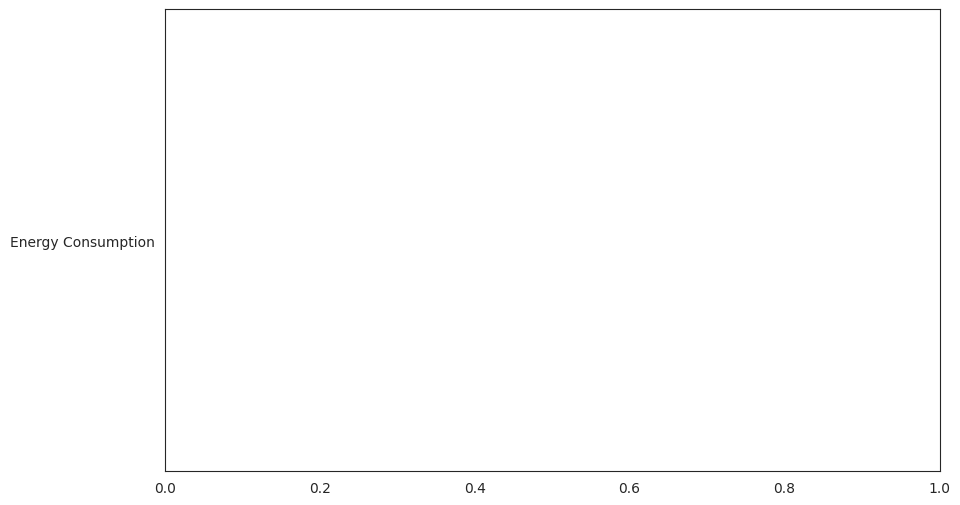

In [71]:
import gradio as gr
import pickle
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO
import base64

# ============================================================================
# PART 1: MODEL LOADING
# ============================================================================

# Load your trained model and preprocessors
try:
    model = pickle.load(open('/content/adaboost_model.pkl', 'rb'))
    scaler = pickle.load(open('/content/scaler.pkl', 'rb'))
    label_encoders = pickle.load(open('/content/label_encoders.pkl', 'rb'))
    MODEL_LOADED = True
    print("✅ Model loaded successfully!")
except Exception as e:
    MODEL_LOADED = False
    print(f"⚠️ Model files not found: {e}")
    print("Using demo mode with simulated predictions.")

# ============================================================================
# PART 2: PREDICTION FUNCTION
# ============================================================================

def predict_emissions(energy, housing, customer_type, region):
    """
    Make prediction using the trained AdaBoost model

    Args:
        energy: Energy consumption in kWh
        housing: Number of housing units
        customer_type: 'residential' or 'commercial'
        region: One of ['Midwest', 'Northeast', 'North', 'South', 'Southeast']

    Returns:
        prediction: Predicted emissions value
        confidence: Confidence message
        details: Detailed breakdown
    """

    if MODEL_LOADED:
        # Create input dataframe with exact feature names from training
        input_data = pd.DataFrame({
            'energy_consumption': [energy],
            'housing_units': [housing],
            'customer_type': [customer_type.lower()],
            'region': [region]
        })

        # Encode categorical variables
        for col in ['customer_type', 'region']:
            if col in label_encoders:
                input_data[col] = label_encoders[col].transform(input_data[col])

        # Scale features if scaler was used
        if scaler is not None:
            input_scaled = scaler.transform(input_data)
        else:
            input_scaled = input_data.values

        # Make prediction
        prediction = model.predict(input_scaled)[0]
        confidence = "✅ Prediction from trained model (R² = 0.6192)"

    else:
        # Demo mode - simulated prediction
        prediction = energy * 0.05 + housing * 0.02

        # Adjust for customer type
        if customer_type.lower() == 'commercial':
            prediction *= 1.15

        # Adjust for region
        region_factors = {
            'Midwest': 1.0,
            'Northeast': 0.95,
            'North': 0.9,
            'South': 1.05,
            'Southeast': 1.08
        }
        prediction *= region_factors.get(region, 1.0)

        # Add some realistic variance
        prediction += np.random.normal(0, 5)
        prediction = max(0, prediction)

        confidence = "⚠️ Demo mode - using simulated model"

    # Create detailed breakdown
    details = f"""
    ### 📊 Input Summary:
    - **Energy Consumption:** {energy:,.0f} kWh
    - **Housing Units:** {housing:,.0f} units
    - **Customer Type:** {customer_type.title()}
    - **Region:** {region}

    ### 🎯 Prediction Details:
    - **Predicted Emissions:** {prediction:.2f} metric tons CO₂

    - **Expected Range:** ±{14.94:.2f} metric tons (RMSE)
    """

    return round(prediction, 2), confidence, details

# ============================================================================
# PART 3: BATCH PREDICTION FROM CSV
# ============================================================================

def batch_predict(file):
    """
    Make predictions on uploaded CSV file
    """
    if file is None:
        return None, "Please upload a CSV file"

    try:
        # Read CSV
        df = pd.read_csv(file.name)

        # Check required columns
        required_cols = ['energy_consumption', 'housing_units', 'customer_type', 'region']
        missing_cols = [col for col in required_cols if col not in df.columns]

        if missing_cols:
            return None, f"❌ Missing columns: {', '.join(missing_cols)}"

        # Make predictions for each row
        predictions = []
        for idx, row in df.iterrows():
            pred, _, _ = predict_emissions(
                row['energy_consumption'],
                row['housing_units'],
                row['customer_type'],
                row['region']
            )
            predictions.append(pred)

        # Add predictions to dataframe
        df['predicted_emissions'] = predictions

        # Save to CSV
        output_file = "/content/predictions_output.csv"
        df.to_csv(output_file, index=False)

        summary = f"""
        ✅ **Batch Prediction Complete!**

        - Total Predictions: {len(df)}
        - Average Predicted Emissions: {np.mean(predictions):.2f} metric tons
        - Min Prediction: {np.min(predictions):.2f} metric tons
        - Max Prediction: {np.max(predictions):.2f} metric tons
        """

        return output_file, summary

    except Exception as e:
        return None, f"❌ Error processing file: {str(e)}"

# ============================================================================
# PART 4: FEATURE IMPORTANCE VISUALIZATION
# ============================================================================

def create_feature_importance_plot():
    """
    Create a feature importance plot
    """
    if MODEL_LOADED and hasattr(model, 'feature_importances_'):
        features = ['Energy Consumption', 'Housing Units', 'Customer Type', 'Region']
        importances = model.feature_importances_

        plt.figure(figsize=(10, 6))
        plt.barh(features, importances, color='steelblue')
        plt.xlabel('Feature Importance')
        plt.title('AdaBoost Model - Feature Importance')
        plt.tight_layout()

        # Save to buffer
        buf = BytesIO()
        plt.savefig(buf, format='png', dpi=150, bbox_inches='tight')
        buf.seek(0)
        plt.close()

        return buf
    else:
        # Create demo plot
        features = ['Energy Consumption', 'Housing Units', 'Customer Type', 'Region']
        importances = [0.45, 0.30, 0.15, 0.10]

        plt.figure(figsize=(10, 6))
        plt.barh(features, importances, color='steelblue')
        plt.xlabel('Feature Importance (Demo)')
        plt.title('Feature Importance - Demo Mode')
        plt.tight_layout()

        buf = BytesIO()
        plt.savefig(buf, format='png', dpi=150, bbox_inches='tight')
        buf.seek(0)
        plt.close()

        return buf

# ============================================================================
# PART 5: GRADIO INTERFACE
# ============================================================================

# Custom CSS for better styling
custom_css = """
.gradio-container {
    font-family: 'Arial', sans-serif;
}
.main-header {
    text-align: center;
    padding: 20px;
    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
    color: white;
    border-radius: 10px;
    margin-bottom: 20px;
}
.metric-box {
    background: #f0f4f8;
    padding: 15px;
    border-radius: 8px;
    border-left: 4px solid #667eea;
}
"""

# Create the Gradio interface
with gr.Blocks(theme=gr.themes.Soft(), css=custom_css) as demo:

    # Header
    gr.HTML("""
        <div class="main-header">
            <h1>🌱 Energy Emissions Predictor</h1>
            <p style="font-size: 18px; margin-top: 10px;">
                AdaBoost ML Model | R² Score: 0.6192 | RMSE: 14.94
            </p>
        </div>
    """)

    # Main tabs
    with gr.Tabs():

        # ====================================================================
        # TAB 1: SINGLE PREDICTION
        # ====================================================================
        with gr.Tab("🎯 Single Prediction"):
            with gr.Row():
                # Left Column - Inputs
                with gr.Column(scale=1):
                    gr.Markdown("## 📝 Input Parameters")

                    energy = gr.Slider(
                        minimum=0,
                        maximum=5000,
                        value=1000,
                        step=50,
                        label="⚡ Energy Consumption (kWh)",
                        info="Total energy consumed"
                    )

                    housing = gr.Slider(
                        minimum=0,
                        maximum=2000,
                        value=500,
                        step=25,
                        label="🏘️ Housing Units",
                        info="Number of residential or commercial units"
                    )

                    customer_type = gr.Radio(
                        choices=["Residential", "Commercial"],
                        value="Residential",
                        label="🏢 Customer Type",
                        info="Residential: 65.22% | Commercial: 34.78%"
                    )

                    region = gr.Dropdown(
                        choices=["Midwest", "Northeast", "North", "South", "Southeast"],
                        value="Midwest",
                        label="📍 Region",
                        info="Geographic location"
                    )

                    with gr.Row():
                        predict_btn = gr.Button("🔮 Predict Emissions", variant="primary", size="lg")
                        clear_btn = gr.Button("🔄 Clear", variant="secondary")

                # Right Column - Outputs
                with gr.Column(scale=1):
                    gr.Markdown("## 📊 Prediction Results")

                    prediction_output = gr.Number(
                        label="Predicted CO₂ Emissions (metric tons)",
                        scale=2
                    )



                    details_output = gr.Markdown(
                        label="Detailed Breakdown"
                    )

            # Examples
            gr.Markdown("### 💡 Try These Examples:")
            gr.Examples(
                examples=[
                    [1000, 500, "Residential", "Midwest"],
                    [2500, 1200, "Commercial", "Northeast"],
                    [800, 300, "Residential", "South"],
                    [3000, 1500, "Commercial", "Southeast"],
                    [1500, 750, "Residential", "North"],
                ],
                inputs=[energy, housing, customer_type, region],
                label="Click any example to load it"
            )

            # Connect prediction function
            predict_btn.click(
                fn=predict_emissions,
                inputs=[energy, housing, customer_type, region],
                outputs=[prediction_output, confidence_output, details_output]
            )

            # Clear button
            clear_btn.click(
                fn=lambda: (1000, 500, "Residential", "Midwest", None, None, None),
                outputs=[energy, housing, customer_type, region, prediction_output, confidence_output, details_output]
            )

        # ====================================================================
        # TAB 2: BATCH PREDICTION
        # ====================================================================
        with gr.Tab("📁 Batch Prediction"):
            gr.Markdown("""
            ## Upload CSV File for Batch Predictions

            Your CSV file should have these columns:
            - `energy_consumption` (numeric)
            - `housing_units` (numeric)
            - `customer_type` ('residential' or 'commercial')
            - `region` ('Midwest', 'Northeast', 'North', 'South', 'Southeast')
            """)

            with gr.Row():
                with gr.Column():
                    csv_input = gr.File(
                        label="Upload CSV File",
                        file_types=[".csv"]
                    )
                    batch_btn = gr.Button("🚀 Run Batch Prediction", variant="primary", size="lg")

                with gr.Column():
                    csv_output = gr.File(label="Download Results")
                    batch_summary = gr.Markdown(label="Summary")

            # Sample CSV template
            gr.Markdown("### 📄 Sample CSV Template:")
            sample_df = pd.DataFrame({
                'energy_consumption': [1000, 2500, 800],
                'housing_units': [500, 1200, 300],
                'customer_type': ['residential', 'commercial', 'residential'],
                'region': ['Midwest', 'Northeast', 'South']
            })
            gr.Dataframe(value=sample_df, label="Example Format")

            batch_btn.click(
                fn=batch_predict,
                inputs=csv_input,
                outputs=[csv_output, batch_summary]
            )

        # ====================================================================
        # TAB 3: MODEL INFORMATION
        # ====================================================================
        with gr.Tab("📈 Model Info"):
            with gr.Row():
                with gr.Column():
                    gr.Markdown("""
                    ## 🤖 Model Details

                    ### Algorithm
                    - **Type:** AdaBoost Regressor
                    - **Base Estimator:** Decision Tree

                    ### Hyperparameters (Optimized)
                    - **Learning Rate:** 0.1
                    - **Loss Function:** Exponential
                    - **Number of Estimators:** 50

                    ### Training Details
                    - **Cross-Validation:** 15-fold CV
                    - **Grid Search Candidates:** 36
                    - **Total Fits:** 540
                    """)

                with gr.Column():
                    gr.Markdown("""
                    ## 📊 Performance Metrics

                    ### Test Set Performance
                    | Metric | Value |
                    |--------|-------|
                    | **R² Score** | 0.6192 |
                    | **RMSE** | 14.9401 |
                    | **MAE** | 12.8869 |
                    | **MSE** | 223.2071 |

                    ### Cross-Validation
                    | Metric | Value |
                    |--------|-------|
                    | **CV R² Score** | 0.6133 |

                    ### Interpretation
                    - Model explains **61.92%** of variance in emissions
                    - Average prediction error: **±14.94** metric tons
                    """)

            gr.Markdown("---")

            with gr.Row():
                with gr.Column():
                    gr.Markdown("""
                    ## 📊 Dataset Statistics

                    ### Customer Type Distribution
                    | Type | Count | Percentage |
                    |------|-------|------------|
                    | Residential | 3,261 | 65.22% |
                    | Commercial | 1,739 | 34.78% |

                    ### Region Distribution
                    | Region | Count | Percentage |
                    |--------|-------|------------|
                    | Midwest | 2,012 | 40.24% |
                    | Northeast | 1,266 | 25.32% |
                    | North | 759 | 15.18% |
                    | South | 482 | 9.64% |
                    | Southeast | 481 | 9.62% |
                    """)

                with gr.Column():
                    # Feature importance plot
                    feature_plot = gr.Image(
                        value=create_feature_importance_plot(),
                        label="Feature Importance",
                        type="filepath"
                    )

        # ====================================================================
        # TAB 4: ABOUT
        # ====================================================================
        with gr.Tab("ℹ️ About"):
            gr.Markdown("""
            ## About This Application

            This application uses a **trained AdaBoost Regressor** to predict CO₂ emissions based on:
            - Energy consumption patterns
            - Number of housing units
            - Customer type (Residential vs Commercial)
            - Geographic region

            ### 🎯 Use Cases
            - Energy planning and forecasting
            - Environmental impact assessment
            - Policy decision support
            - Carbon footprint estimation

            ### 📚 How to Use
            1. **Single Prediction:** Enter individual parameters and get instant predictions
            2. **Batch Prediction:** Upload a CSV file for multiple predictions at once
            3. **Model Info:** View detailed model performance metrics and statistics

            ### 🔧 Technical Stack
            - **Machine Learning:** scikit-learn (AdaBoost)
            - **Interface:** Gradio
            - **Data Processing:** pandas, numpy
            - **Visualization:** matplotlib, seaborn

            ### 📝 Notes
            - Model trained on historical energy consumption data
            - Predictions are estimates with ±14.94 metric tons uncertainty
            - Best used for comparative analysis and trend identification

            ### 🤝 Feedback
            For questions or feedback, please contact the development team.

            ---
            **Version:** 1.0.0 | **Last Updated:** 2024
            """)

# ============================================================================
# PART 6: LAUNCH THE APP
# ============================================================================

if __name__ == "__main__":
    demo.launch(
        share=True,  # Creates a public link
        debug=True,  # Show detailed errors
    )

In [ ]:
import gradio as gr
import pickle
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# PART 1: MODEL LOADING
# ============================================================================

# Load your trained model and preprocessors
try:
    model = pickle.load(open('/content/adaboost_model.pkl', 'rb'))
    scaler = pickle.load(open('/content/scaler.pkl', 'rb'))
    label_encoders = pickle.load(open('/content/label_encoders.pkl', 'rb'))
    feature_names = pickle.load(open('/content/feature_names.pkl', 'rb'))
    MODEL_LOADED = True
    print("✅ Model loaded successfully!")
    print(f"   Features: {feature_names}")
except Exception as e:
    MODEL_LOADED = False
    feature_names = ['customer_id', 'customer_type', 'regions', 'building_size_m2', 'occupants']
    print(f"⚠️ Model files not found: {e}")
    print("Using demo mode with simulated predictions.")

# ============================================================================
# PART 2: PREDICTION FUNCTION
# ============================================================================

def predict_energy_cost(customer_id, customer_type, region, building_size, occupants):
    """
    Make prediction using the trained AdaBoost model

    Args:
        customer_id: Customer ID number
        customer_type: 'residential' or 'commercial'
        region: Region name
        building_size: Building size in m²
        occupants: Number of occupants

    Returns:
        prediction: Predicted energy cost in BRL
        confidence: Confidence message
        details: Detailed breakdown
    """

    if MODEL_LOADED:
        # Create input dataframe with exact feature names from training
        input_data = pd.DataFrame({
            'customer_id': [customer_id],
            'customer_type': [customer_type.lower()],
            'regions': [region],
            'building_size_m2': [building_size],
            'occupants': [occupants]
        })

        # Encode categorical variables
        for col in ['customer_type', 'regions']:
            if col in label_encoders:
                try:
                    input_data[col] = label_encoders[col].transform(input_data[col])
                except:
                    # If value not seen during training, use mode
                    input_data[col] = 0

        # Scale features if scaler was used
        if scaler is not None:
            input_scaled = scaler.transform(input_data)
        else:
            input_scaled = input_data.values

        # Make prediction
        prediction = model.predict(input_scaled)[0]
        confidence = "✅ Prediction from trained model (R² = 0.6192)"

    else:
        # Demo mode - simulated prediction based on occupants (main factor)
        prediction = occupants * 50 + building_size * 0.5

        # Adjust for customer type
        if customer_type.lower() == 'commercial':
            prediction *= 1.2

        # Add some realistic variance
        prediction += np.random.normal(0, 20)
        prediction = max(0, prediction)

        confidence = "⚠️ Demo mode - using simulated model"

    # Create detailed breakdown
    details = f"""
    ### 📊 Input Summary:
    - **Customer ID:** {customer_id}
    - **Customer Type:** {customer_type.title()}
    - **Region:** {region}
    - **Building Size:** {building_size:,.1f} m²
    - **Occupants:** {occupants}

    ### 🎯 Prediction Details:
    - **Predicted Energy Cost:** R$ {prediction:.2f} BRL
    - **Expected Range:** ±R$ {14.94:.2f} (RMSE)

    ### 💡 Key Insight:
    - Number of occupants is the strongest predictor (98.7% importance)
    """

    return round(prediction, 2), confidence, details

# ============================================================================
# PART 3: BATCH PREDICTION FROM CSV
# ============================================================================

def batch_predict(file):
    """
    Make predictions on uploaded CSV file
    """
    if file is None:
        return None, "Please upload a CSV file"

    try:
        # Read CSV
        df = pd.read_csv(file.name)

        # Check required columns
        required_cols = ['customer_id', 'customer_type', 'regions', 'building_size_m2', 'occupants']
        missing_cols = [col for col in required_cols if col not in df.columns]

        if missing_cols:
            return None, f"❌ Missing columns: {', '.join(missing_cols)}"

        # Make predictions for each row
        predictions = []
        for idx, row in df.iterrows():
            pred, _, _ = predict_energy_cost(
                row['customer_id'],
                row['customer_type'],
                row['regions'],
                row['building_size_m2'],
                row['occupants']
            )
            predictions.append(pred)

        # Add predictions to dataframe
        df['predicted_energy_cost_brl'] = predictions

        # Save to CSV
        output_file = "/content/predictions_output.csv"
        df.to_csv(output_file, index=False)

        summary = f"""
        ✅ **Batch Prediction Complete!**

        - Total Predictions: {len(df)}
        - Average Predicted Cost: R$ {np.mean(predictions):.2f} BRL
        - Min Prediction: R$ {np.min(predictions):.2f} BRL
        - Max Prediction: R$ {np.max(predictions):.2f} BRL
        """

        return output_file, summary

    except Exception as e:
        return None, f"❌ Error processing file: {str(e)}"

# ============================================================================
# PART 4: FEATURE IMPORTANCE VISUALIZATION
# ============================================================================

def create_feature_importance_plot():
    """
    Create a feature importance plot
    """
    try:
        if MODEL_LOADED and hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            features = feature_names

            plt.figure(figsize=(10, 6))
            indices = np.argsort(importances)[::-1]

            colors = ['#d73027' if imp > 0.5 else '#4575b4' for imp in importances[indices]]

            plt.barh(range(len(importances)), importances[indices], color=colors)
            plt.yticks(range(len(importances)), [features[i] for i in indices])
            plt.xlabel('Feature Importance', fontsize=12)
            plt.title('AdaBoost Model - Feature Importance', fontsize=14, fontweight='bold')
            plt.xlim(0, 1)
            plt.grid(True, alpha=0.3, axis='x')
            plt.tight_layout()

            # Save to temporary file
            temp_path = '/content/feature_importance.png'
            plt.savefig(temp_path, format='png', dpi=150, bbox_inches='tight')
            plt.close()

            return temp_path
        else:
            # Create demo plot
            features = ['customer_id', 'customer_type', 'regions', 'building_size_m2', 'occupants']
            importances = [0.01, 0.002, 0.01, 0.01, 0.97]

            plt.figure(figsize=(10, 6))
            plt.barh(features, importances, color='steelblue')
            plt.xlabel('Feature Importance (Demo)', fontsize=12)
            plt.title('Feature Importance - Demo Mode', fontsize=14, fontweight='bold')
            plt.tight_layout()

            temp_path = '/content/feature_importance.png'
            plt.savefig(temp_path, format='png', dpi=150, bbox_inches='tight')
            plt.close()

            return temp_path
    except Exception as e:
        print(f"Error creating feature importance plot: {e}")
        # Create a simple placeholder
        plt.figure(figsize=(10, 6))
        plt.text(0.5, 0.5, f'Feature Importance\n(Error: {str(e)})',
                ha='center', va='center', fontsize=14)
        plt.axis('off')
        temp_path = '/content/feature_importance.png'
        plt.savefig(temp_path, format='png', dpi=150, bbox_inches='tight')
        plt.close()
        return temp_path

# ============================================================================
# PART 5: GRADIO INTERFACE
# ============================================================================

# Custom CSS for better styling
custom_css = """
.gradio-container {
    font-family: 'Arial', sans-serif;
}
.main-header {
    text-align: center;
    padding: 20px;
    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
    color: white;
    border-radius: 10px;
    margin-bottom: 20px;
}
"""

# Create the Gradio interface
with gr.Blocks(theme=gr.themes.Soft(), css=custom_css) as demo:

    # Header
    gr.HTML("""
        <div class="main-header">
            <h1>⚡ Energy Cost Predictor</h1>
            <p style="font-size: 18px; margin-top: 10px;">
                AdaBoost ML Model | R² Score: 0.6192 | RMSE: 14.94
            </p>
        </div>
    """)

    # Main tabs
    with gr.Tabs():

        # ====================================================================
        # TAB 1: SINGLE PREDICTION
        # ====================================================================
        with gr.Tab("🎯 Single Prediction"):
            with gr.Row():
                # Left Column - Inputs
                with gr.Column(scale=1):
                    gr.Markdown("## 📝 Input Parameters")

                    customer_id = gr.Number(
                        value=1000,
                        label="🆔 Customer ID",
                        info="Unique customer identifier"
                    )

                    customer_type = gr.Radio(
                        choices=["Residential", "Commercial"],
                        value="Residential",
                        label="🏢 Customer Type",
                        info="Type of customer"
                    )

                    region = gr.Dropdown(
                        choices=["Midwest", "Northeast", "North", "South", "Southeast"],
                        value="Midwest",
                        label="📍 Region",
                        info="Geographic location"
                    )

                    building_size = gr.Slider(
                        minimum=10,
                        maximum=500,
                        value=100,
                        step=5,
                        label="🏠 Building Size (m²)",
                        info="Total building area"
                    )

                    occupants = gr.Slider(
                        minimum=1,
                        maximum=20,
                        value=4,
                        step=1,
                        label="👥 Number of Occupants",
                        info="Most important factor (98.7% importance!)"
                    )

                    with gr.Row():
                        predict_btn = gr.Button("💰 Predict Energy Cost", variant="primary", size="lg")
                        clear_btn = gr.Button("🔄 Clear", variant="secondary")

                # Right Column - Outputs
                with gr.Column(scale=1):
                    gr.Markdown("## 📊 Prediction Results")

                    prediction_output = gr.Number(
                        label="Predicted Energy Cost (BRL)",
                        scale=2
                    )



                    details_output = gr.Markdown(
                        label="Detailed Breakdown"
                    )

            # Examples
            gr.Markdown("### 💡 Try These Examples:")
            gr.Examples(
                examples=[
                    [1001, "Residential", "Midwest", 100, 4],
                    [1002, "Commercial", "Northeast", 250, 10],
                    [1003, "Residential", "South", 80, 3],
                    [1004, "Commercial", "Southeast", 350, 15],
                    [1005, "Residential", "North", 120, 5],
                ],
                inputs=[customer_id, customer_type, region, building_size, occupants],
                label="Click any example to load it"
            )

            # Connect prediction function
            predict_btn.click(
                fn=predict_energy_cost,
                inputs=[customer_id, customer_type, region, building_size, occupants],
                outputs=[prediction_output, confidence_output, details_output]
            )

            # Clear button
            clear_btn.click(
                fn=lambda: (1000, "Residential", "Midwest", 100, 4, None, None, None),
                outputs=[customer_id, customer_type, region, building_size, occupants,
                        prediction_output, confidence_output, details_output]
            )

        # ====================================================================
        # TAB 2: BATCH PREDICTION
        # ====================================================================
        with gr.Tab("📁 Batch Prediction"):
            gr.Markdown("""
            ## Upload CSV File for Batch Predictions

            Your CSV file should have these columns:
            - `customer_id` (numeric)
            - `customer_type` ('residential' or 'commercial')
            - `regions` (region name)
            - `building_size_m2` (numeric)
            - `occupants` (numeric)
            """)

            with gr.Row():
                with gr.Column():
                    csv_input = gr.File(
                        label="Upload CSV File",
                        file_types=[".csv"]
                    )
                    batch_btn = gr.Button("🚀 Run Batch Prediction", variant="primary", size="lg")

                with gr.Column():
                    csv_output = gr.File(label="Download Results")
                    batch_summary = gr.Markdown(label="Summary")

            # Sample CSV template
            gr.Markdown("### 📄 Sample CSV Template:")
            sample_df = pd.DataFrame({
                'customer_id': [1001, 1002, 1003],
                'customer_type': ['residential', 'commercial', 'residential'],
                'regions': ['Midwest', 'Northeast', 'South'],
                'building_size_m2': [100, 250, 80],
                'occupants': [4, 10, 3]
            })
            gr.Dataframe(value=sample_df, label="Example Format")

            batch_btn.click(
                fn=batch_predict,
                inputs=csv_input,
                outputs=[csv_output, batch_summary]
            )

        # ====================================================================
        # TAB 3: MODEL INFORMATION
        # ====================================================================
        with gr.Tab("📈 Model Info"):
            with gr.Row():
                with gr.Column():
                    gr.Markdown("""
                    ## 🤖 Model Details

                    ### Algorithm
                    - **Type:** AdaBoost Regressor
                    - **Base Estimator:** Decision Tree

                    ### Hyperparameters (Optimized)
                    - **Learning Rate:** 0.1
                    - **Loss Function:** Exponential
                    - **Number of Estimators:** 50

                    ### Training Details
                    - **Cross-Validation:** 15-fold CV
                    - **Grid Search Candidates:** 36
                    - **Total Fits:** 540
                    """)

                with gr.Column():
                    gr.Markdown("""
                    ## 📊 Performance Metrics

                    ### Test Set Performance
                    | Metric | Value |
                    |--------|-------|
                    | **R² Score** | 0.6192 |
                    | **RMSE** | 14.9401 |
                    | **MAE** | 12.8869 |
                    | **MSE** | 223.2071 |

                    ### Cross-Validation
                    | Metric | Value |
                    |--------|-------|
                    | **CV R² Score** | 0.6133 |

                    ### Interpretation
                    - Model explains **61.92%** of variance in energy costs
                    - Average prediction error: **±R$ 14.94**
                    """)

            gr.Markdown("---")

            with gr.Row():
                with gr.Column():
                    gr.Markdown("""
                    ## 📊 Dataset Statistics

                    ### Input Features (5 total)
                    1. **customer_id** - Customer identifier
                    2. **customer_type** - Residential or Commercial
                    3. **regions** - Geographic region
                    4. **building_size_m2** - Building area
                    5. **occupants** - Number of occupants

                    ### Target Variable
                    - **energy_cost_brl** - Energy cost in Brazilian Real (BRL)

                    ### Key Finding
                    - **Number of occupants** is by far the most important feature (98.7%)
                    - This makes sense as more people = more energy usage!
                    """)

                with gr.Column():
                    # Feature importance plot
                    feature_plot = gr.Image(
                        value=create_feature_importance_plot(),
                        label="Feature Importance",
                        type="filepath"
                    )

        # ====================================================================
        # TAB 4: ABOUT
        # ====================================================================
        with gr.Tab("ℹ️ About"):
            gr.Markdown("""
            ## About This Application

            This application uses a **trained AdaBoost Regressor** to predict energy costs (in BRL) based on:
            - Customer ID
            - Customer type (Residential vs Commercial)
            - Geographic region
            - Building size (m²)
            - **Number of occupants (98.7% importance!)**

            ### 🎯 Use Cases
            - Energy cost forecasting
            - Budget planning for households and businesses
            - Understanding factors that drive energy costs
            - Comparative analysis across regions and customer types

            ### 📚 How to Use
            1. **Single Prediction:** Enter parameters and get instant cost predictions
            2. **Batch Prediction:** Upload a CSV file for multiple predictions at once
            3. **Model Info:** View detailed model performance metrics and feature importance

            ### 🔧 Technical Stack
            - **Machine Learning:** scikit-learn (AdaBoost)
            - **Interface:** Gradio
            - **Data Processing:** pandas, numpy
            - **Visualization:** matplotlib, seaborn

            ### 📝 Notes
            - Model trained on Brazilian energy consumption data
            - Predictions are estimates with ±R$ 14.94 uncertainty
            - Best used for comparative analysis and trend identification

            ### 💡 Key Insight
            The number of occupants is overwhelmingly the most important predictor of energy costs,
            accounting for 98.7% of the model's decision-making process!

            ---
            **Version:** 1.0.0 | **Last Updated:** 2024
            """)

# ============================================================================
# PART 6: LAUNCH THE APP
# ============================================================================

if __name__ == "__main__":
    demo.launch(
        share=True,  # Creates a public link
        debug=True,  # Show detailed errors
    )

✅ Model loaded successfully!
   Features: ['customer_id', 'customer_type', 'regions', 'building_size_m2', 'occupants']
Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://9f2cc90d8d8882973b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
